# MNIST experiments

faisal.qureshi@ontariotechu.ca

In [114]:
from importlib import reload
import matplotlib.pyplot as plt
import torch
import data
import modelae
import train
import evaluate

# Data

In [115]:
reload(data)

<module 'data' from '/home/dockeruser/code/pytorch-notes/lessons/mnist-experiments/data.py'>

In [116]:
dataset = data.set_mnist_data(datafolder='../../datasets', digits=[6])

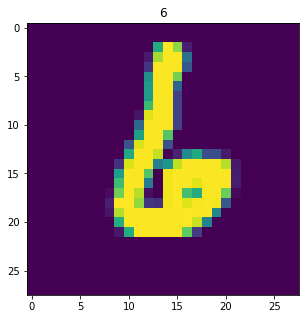

In [117]:
img, label = data.view(dataset)
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.title(label);

## Training, validation and test datasets

In [107]:
training_dataset, validation_dataset, test_dataset = data.split_training_validation_test(dataset, 0.5, 0.2, 0.3)

Datasets:
  Total samples: 5918
  Training samples: 2959
  Validation samples: 1183
  Test samples: 1776


# Model

In [108]:
reload(modelae)

<module 'modelae' from '/home/dockeruser/code/pytorch-notes/lessons/mnist-experiments/modelae.py'>

In [118]:
ae = modelae.AutoEncoder()
print(ae)

AutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(3, 3), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(8, 16, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(16, 8, kernel_size=(5, 5), stride=(3, 3), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(8, 1, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1))
    (5): Tanh()
  )
)


# Compute environment

In [119]:
print(f'Cuda is available: {torch.cuda.is_available()}')

for i in range(torch.cuda.device_count()):
    print(f'Device {i}: {torch.cuda.get_device_name(i)}')

Cuda is available: True
Device 0: GeForce GTX TITAN X
Device 1: GeForce GTX 980


# Model training

## Setting up training, validation, and test dataloaders

In [120]:
training_dataloader, validation_dataloader, test_dataloader = data.set_dataloaders(training_dataset,
                                                                                   validation_dataset,
                                                                                   test_dataset,
                                                                                   batch_size=16,
                                                                                   shuffle=False)

Dataloaders:
  Batch size: 16
  Shuffle: False
  Training batches: 185
  Validation batches: 74
  Test batches: 111


## Training

In [121]:
reload(train)

<module 'train' from '/home/dockeruser/code/pytorch-notes/lessons/mnist-experiments/train.py'>

In [122]:
training = train.Training(0)

training.set_loss()
training.set_model(ae)
training.set_optimizer(learning_rate=1e-2, weight_decay=1e-5)
training.set_training_dataloader(training_dataloader)
training.set_validation_dataloader(validation_dataloader)

Training on [0]: GeForce GTX TITAN X


### Do some training for a few epochs.

In [123]:
training.train(5, show_loss=True, checkpt_every=-1)

epoch=      1, train=        0.21706, validation=         0.1477
epoch=      2, train=        0.12516, validation=        0.11706
epoch=      3, train=        0.10843, validation=        0.10653
epoch=      4, train=        0.10089, validation=       0.099063
epoch=      5, train=       0.095392, validation=       0.096071
Average time per epoch (ms):
	train=           367.3, validation=           39.58
Saving checkpoint: ./checkpoints/chkpt-0000005.pt ... done


In [124]:
training.losses

{'train': [0.21706401137886822,
  0.12515540743196332,
  0.10842638519164678,
  0.10088505116668907,
  0.09539238069508527],
 'validation': [0.14769588400785988,
  0.11706411637164452,
  0.10652628198668763,
  0.0990631933751944,
  0.09607089824370436],
 'epoch': [1, 2, 3, 4, 5]}

In [125]:
training.train(10, show_loss=True, checkpt_every=2)

epoch=      6, train=        0.09175, validation=       0.092324
Saving checkpoint: ./checkpoints/chkpt-0000006.pt ... done
epoch=      7, train=        0.08869, validation=       0.090151
epoch=      8, train=       0.086462, validation=        0.09023
Saving checkpoint: ./checkpoints/chkpt-0000008.pt ... done
epoch=      9, train=       0.084633, validation=       0.088524
epoch=     10, train=       0.082874, validation=       0.087479
Saving checkpoint: ./checkpoints/chkpt-0000010.pt ... done
epoch=     11, train=        0.08155, validation=       0.085217
epoch=     12, train=       0.080126, validation=       0.085226
Saving checkpoint: ./checkpoints/chkpt-0000012.pt ... done
epoch=     13, train=       0.078681, validation=       0.082904
epoch=     14, train=       0.077997, validation=       0.082492
Saving checkpoint: ./checkpoints/chkpt-0000014.pt ... done
epoch=     15, train=       0.077282, validation=       0.082286
Average time per epoch (ms):
	train=           368.4, v

### Now load from checkpoint and continue training.

In [126]:
training = train.Training(-1)

training.set_loss()
training.set_model(ae)
training.set_optimizer(learning_rate=0, weight_decay=0)
training.set_training_dataloader(training_dataloader)
training.set_validation_dataloader(validation_dataloader)
training.load_checkpoint('./checkpoints/chkpt-0000015.pt')

Training on CPU (No cuda-enabled device found)
[Success] Checkpoint loaded: ./checkpoints/chkpt-0000015.pt


In [127]:
print(training.current_epoch)
print(training.losses)

15
{'train': [0.21706401137886822, 0.12515540743196332, 0.10842638519164678, 0.10088505116668907, 0.09539238069508527, 0.09175025881142229, 0.0886898715149712, 0.08646180637784906, 0.08463301042447219, 0.08287442646719315, 0.08155010670826242, 0.0801257316929263, 0.07868139882748192, 0.07799682389642741, 0.07728202463807286], 'validation': [0.14769588400785988, 0.11706411637164452, 0.10652628198668763, 0.0990631933751944, 0.09607089824370436, 0.09232396773389868, 0.09015072147185738, 0.09022963797119823, 0.08852376074001596, 0.0874789575165188, 0.08521674361986083, 0.08522616563415206, 0.08290415503890128, 0.08249229097084419, 0.08228646108024829], 'epoch': []}


In [128]:
training.train(5, show_loss=True)

epoch=     16, train=       0.076604, validation=       0.081797
epoch=     17, train=       0.075872, validation=       0.081471
epoch=     18, train=       0.075221, validation=       0.079545
epoch=     19, train=       0.074373, validation=       0.079045
epoch=     20, train=       0.073697, validation=       0.078391
Average time per epoch (ms):
	train=           552.0, validation=           93.43
Saving checkpoint: ./checkpoints/chkpt-0000020.pt ... done


# Inference

In [129]:
reload(evaluate)

<module 'evaluate' from '/home/dockeruser/code/pytorch-notes/lessons/mnist-experiments/evaluate.py'>

## Evaluating on a single test image

Lets first see how well this autoencoder model does on a single test image.  We will pick an image from our test_dataset

In [130]:
inference = evaluate.Evaluate(0)
inference.set_loss()
inference.set_model(training.get_model())

Evaluating on [0]: GeForce GTX TITAN X


Took 0.9530559778213501 ms


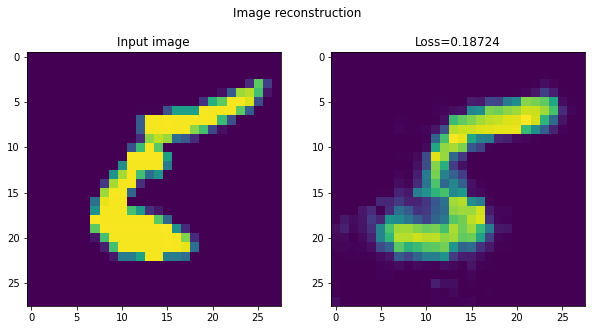

In [74]:
idx = 130
data_item = test_dataset[idx]
input_img = data_item['sample'] 

rec_img, loss, _ = inference.reconstruct_one_image(input_img)

plt.figure(figsize=(10,5))
plt.suptitle('Image reconstruction')
plt.subplot(121)
plt.title('Input image')
plt.imshow(input_img.squeeze())
plt.subplot(122)
plt.title(f'Loss={loss:06.5}')
plt.imshow(rec_img.squeeze());

In [78]:
test_dataloader = torch.utils.data.DataLoader(test_dataset,
                                              batch_size=1,
                                              shuffle=False)

inference.evaluate(test_dataloader);

Loss: mean=0.13894126786820016, average=0.0022909715579221587
Took 714.7518310546875 ms


In [ ]:
print(loss)

In [ ]:
output.shape

In [ ]:
idx[:3]

In [ ]:
idx[3:7]